# Desvendando o Mercado Automotivo Global

Com o constante dinamismo do mercado automotivo global, a análise de dados desempenha um papel crucial para entender as tendências, padrões e fatores que impulsionam as vendas de veículos. Um conjunto de dados abrangente sobre vendas de automóveis pode fornecer insights valiosos para fabricantes, revendedores e profissionais do setor automotivo. Nesse contexto, examinaremos diversas facetas do mercado, desde análises regionais até a correlação entre variáveis específicas, visando uma compreensão mais profunda e informada do cenário de vendas automotivas globais.

A partir desses dados, gostaríamos de realizar as seguintes análises:

* Análise de Vendas por Região do Revendedor
* Segmentação de Clientes por Gênero e Renda Anual
* Preço Médio por Modelo de Carro
* Análise Temporal de Vendas
* Desempenho de Revendedores
* Análise de Correlação
* Distribuição de Estilos de Carro Vendidos
* Variação de Preço por Cor e Estilo do Carro
* Análise de Demanda por Região e Estilo do Carro
* Análise de Desempenho do Modelo de Carro ao Longo do Tempo
* Análise de Sazonalidade nas Vendas de Carros
* Análise de Lucratividade por Modelo de Carro e Revendedor
* Análise de Preferências de Transmissão por Gênero
* Análise de Correlação entre Características do Carro e Preço

Com isso, pretendemos responder a uma variedade de questões relacionadas ao mercado automotivo global, desde as preferências dos clientes até a performance dos revendedores e fatores que influenciam os preços dos veículos. Essas análises proporcionarão uma visão abrangente e estratégica para os diversos agentes envolvidos na indústria automotiva.

### Integrantes do Projeto

* Gabriel Vilarinho : https://www.linkedin.com/in/gabriel-vilarinho/
* Jésya Lima : https://www.linkedin.com/in/jesyadelima/
* Renan Silva: https://www.linkedin.com/in/renan-msilva/

## 1. Conhecendo os dados

### Fonte dos dados

https://www.kaggle.com/datasets/missionjee/car-sales-report

### Importação das bibliotecas e leitura do dataset

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
dados = pd.read_csv('Car Sales.csv')
dados

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


### Variáveis utilizadas para as análises

* **Car_id:** Identificação do carro
* **Date:** Data da venda
* **Gender:** Sexo do cliente
* **Annual Income:** Renda anual do cliente
* **Dealer_Name:** Nome da concessionária
* **Company:** Marca do carro
* **Model:** Modelo do carro
* **Engine:** Motor do carro
* **Transmission:** Tipo de transmissão do carro
* **Color:** Cor do carro
* **Price ($):** Preço da venda
* **Body Style:** Estilo/design do carro
* **Dealer_Region:** Região da concessionária


Observações:
Os seguintes tratamentos foram realizados no dados originais:
1. Foi eliminada a coluna 'Costumer Name' por contem apenas o primeiro nome dos clientes então ela não fornece informações significativas ou relevantes para a análise.

2. Foram eliminadas as colunas 'Dealer_No' e 'Phone' por não trazerem informações úteis para as análises.

In [199]:
dados = dados.drop(columns = ['Customer Name', 'Dealer_No ', 'Phone'], axis = 1)
dados.head()

,Car_id,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,C_CND_000001,1/2/2022,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,C_CND_000002,1/2/2022,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,C_CND_000003,1/2/2022,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,C_CND_000004,1/2/2022,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,C_CND_000005,1/2/2022,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


### Dados descritivos e tipos de variáveis

In [200]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Gender         23906 non-null  object
 3   Annual Income  23906 non-null  int64 
 4   Dealer_Name    23906 non-null  object
 5   Company        23906 non-null  object
 6   Model          23906 non-null  object
 7   Engine         23906 non-null  object
 8   Transmission   23906 non-null  object
 9   Color          23906 non-null  object
 10  Price ($)      23906 non-null  int64 
 11  Body Style     23906 non-null  object
 12  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.4+ MB


Alteração do tipo da coluna 'Date' de 'object' para 'datetime' para permitir o uso de funcionalidades específicas de manipulação, como agrupamento por período de tempo e filtro por intervalos de datas.

In [201]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Gender         23906 non-null  object        
 3   Annual Income  23906 non-null  int64         
 4   Dealer_Name    23906 non-null  object        
 5   Company        23906 non-null  object        
 6   Model          23906 non-null  object        
 7   Engine         23906 non-null  object        
 8   Transmission   23906 non-null  object        
 9   Color          23906 non-null  object        
 10  Price ($)      23906 non-null  int64         
 11  Body Style     23906 non-null  object        
 12  Dealer_Region  23906 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 2.4+ MB


In [202]:
dados.describe()

,Date,Annual Income,Price ($)
count,23906,2.390600e+04,23906.000000
mean,2023-03-01 14:28:10.822387456,8.308403e+05,28090.247846
min,2022-01-02 00:00:00,1.008000e+04,1200.000000
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000
75%,2023-09-08 00:00:00,1.175750e+06,34000.000000
max,2023-12-31 00:00:00,1.120000e+07,85800.000000
std,NaN,7.200064e+05,14788.687608


### Verificação de dados duplicados ou nulos


In [203]:
# Verificando se há dados duplicados
dados[dados.duplicated()]

,Car_id,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region


In [204]:
# Verificando se o carro aparecesse mais de 1 vez
dados[dados['Car_id'].duplicated()]

,Car_id,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region


In [205]:
# Verificando a existencia de dados nulos
dados.isna().sum()

Car_id           0
Date             0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64

## 2. Análises

**1. Análise de Vendas por Região do Revendedor:** Você pode agrupar os dados pelo "Dealer_Region" e analisar as vendas totais ou médias em cada região.

In [206]:
grupo_vendas = dados.groupby('Dealer_Region')['Price ($)'].agg(['sum', 'mean']).reset_index()
grupo_vendas

,Dealer_Region,sum,mean
0,Aurora,88687382,28334.626837
1,Austin,117192531,28341.603628
2,Greenville,88149602,28180.819054
3,Janesville,106351234,27833.350955
4,Middletown,87134628,27856.338875
5,Pasco,88040714,28119.039923
6,Scottsdale,95969374,27954.958928


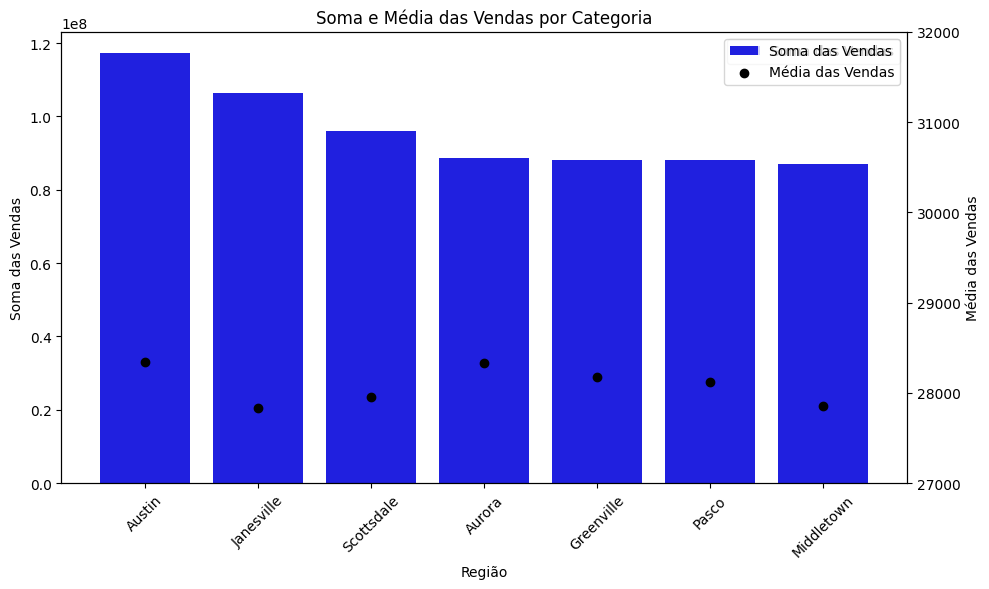

In [207]:
grupo_vendas = dados.groupby('Dealer_Region')['Price ($)'].agg(['sum', 'mean']).reset_index()
grupo_vendas = grupo_vendas.sort_values(by='sum', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x='Dealer_Region', y='sum', data=grupo_vendas, color='blue', label='Soma das Vendas', ax=ax1)

ax1.set_xlabel('Região')
ax1.set_ylabel('Soma das Vendas')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.scatter(grupo_vendas['Dealer_Region'], grupo_vendas['mean'], color='black', label='Média das Vendas')
ax2.set_ylabel('Média das Vendas')
ax2.set_ylim(27000, 32000)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Soma e Média das Vendas por Categoria')
plt.tight_layout()
plt.show()

**2. Segmentação de Clientes por Gênero e Renda Anual:** Explore a distribuição de gênero entre os clientes e como ela se relaciona com a renda anual. Isso pode ajudar a identificar padrões de compra entre diferentes grupos demográficos.

In [208]:
dados_sexo = dados.groupby('Gender')[['Annual Income']].agg(['count', 'mean']).reset_index()
dados_sexo

Gender Annual Income               
                  count           mean
0  Female          5108  755973.021339
1    Male         18798  851184.044207

In [209]:
dados_sexo['Annual Income']['count']

0     5108
1    18798
Name: count, dtype: int64

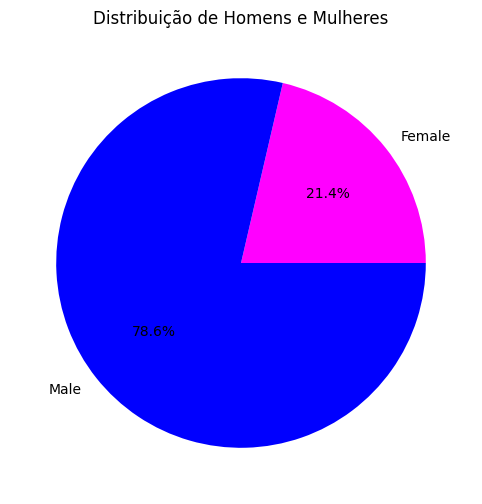

In [210]:
labels = dados_sexo['Gender']
sizes = dados_sexo['Annual Income']['count']
colors = ['fuchsia', 'blue'] 

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title('Distribuição de Homens e Mulheres')

plt.show()

In [211]:
#Criando dados para segmentar os clientes
dados.loc[dados['Annual Income']<100000, 'Income_Category'] = 'Até 100 mil'
dados.loc[(dados['Annual Income']>=100000) & (dados['Annual Income']<=500000.0), 'Income_Category'] = 'De 100 a 500 mil'
dados.loc[(dados['Annual Income']>500000) & (dados['Annual Income']<=1000000.0), 'Income_Category'] = 'De 500 mil a 1 milhão'
dados.loc[dados['Annual Income']>1000000, 'Income_Category'] = 'Maior que 1 milhão'
dados.head(3)

,Car_id,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Income_Category
0,C_CND_000001,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,Até 100 mil
1,C_CND_000002,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,Maior que 1 milhão
2,C_CND_000003,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,Maior que 1 milhão


In [212]:
male_category = dados[dados['Gender'] == 'Male']
female_category = dados[dados['Gender'] == 'Female']

male_income_category = male_category.groupby(['Income_Category'])[['Gender']].count().reset_index()
female_income_category = female_category.groupby(['Income_Category'])[['Gender']].count().reset_index()

In [213]:
male_income_category

,Income_Category,Gender
0,Até 100 mil,4140
1,De 100 a 500 mil,1617
2,De 500 mil a 1 milhão,6777
3,Maior que 1 milhão,6264


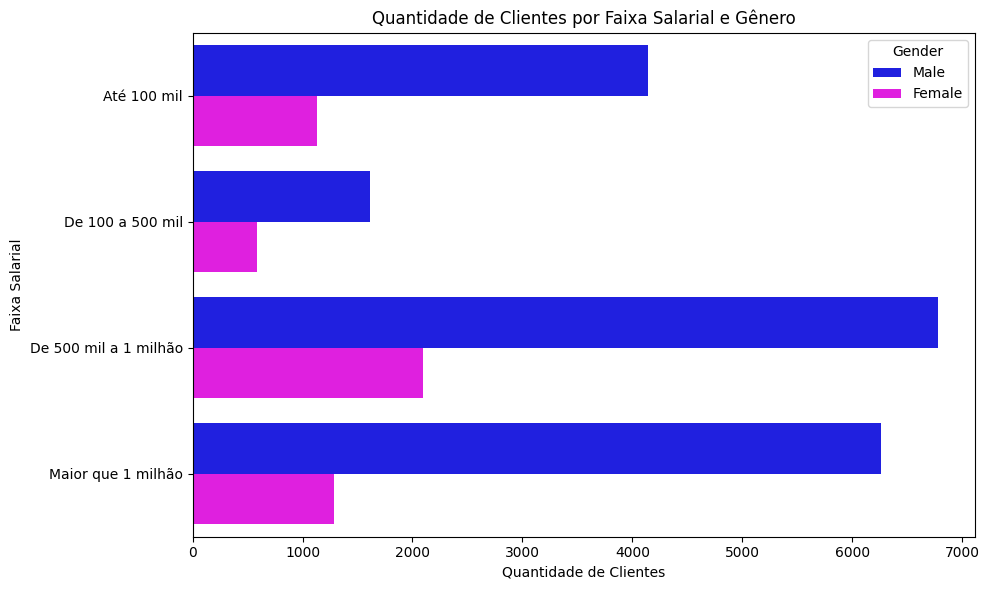

In [214]:
male_category = dados[dados['Gender'] == 'Male']
female_category = dados[dados['Gender'] == 'Female']

male_income_category = male_category.groupby('Income_Category').size().reset_index(name='Quantity')
female_income_category = female_category.groupby('Income_Category').size().reset_index(name='Quantity')

combined_data = pd.concat([male_income_category.assign(Gender='Male'), female_income_category.assign(Gender='Female')])

plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Income_Category', hue='Gender', data=combined_data, orient='h', palette={'Male': 'blue', 'Female': 'fuchsia'})
plt.title('Quantidade de Clientes por Faixa Salarial e Gênero')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Faixa Salarial')
plt.tight_layout()
plt.show()

C:\Users\renan\AppData\Local\Temp\ipykernel_9368\848119774.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Gender', y='Annual Income', ax=axes[0], palette = palette)


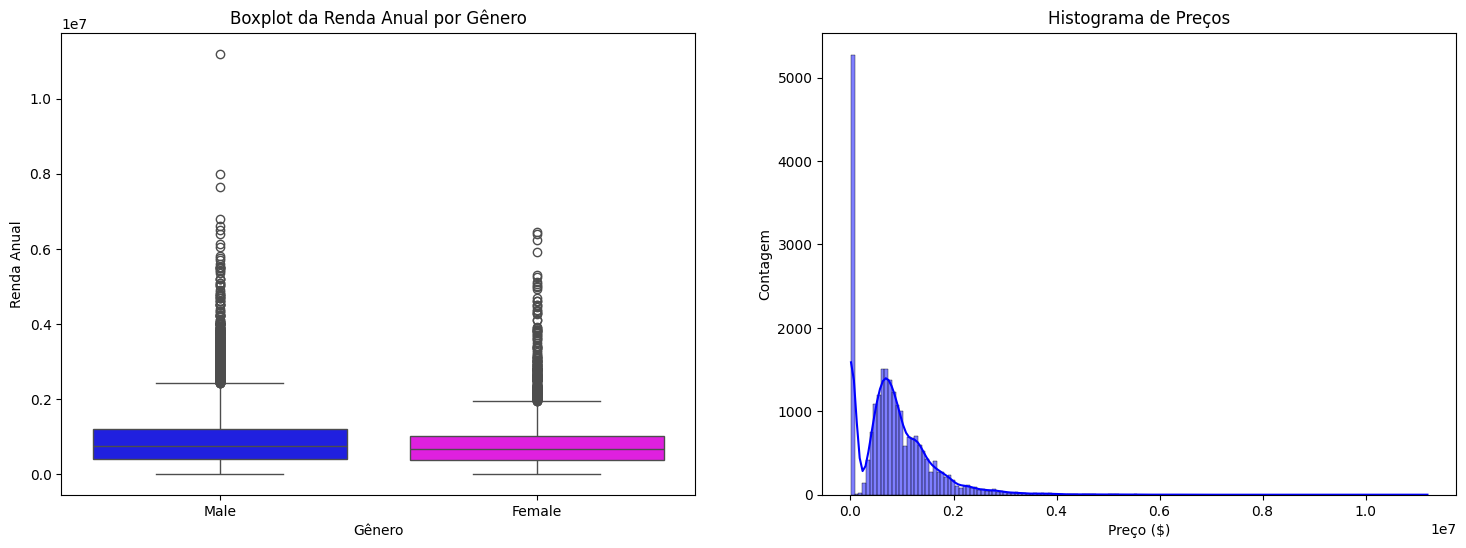

In [215]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
palette = ["blue", "fuchsia"]

sns.boxplot(data=dados, x='Gender', y='Annual Income', ax=axes[0], palette = palette)

num_bins = int(np.ceil(np.sqrt(len(dados))))
sns.histplot(data=dados, x='Annual Income', bins=num_bins, kde=True, ax=axes[1], color = 'blue')

axes[0].set_xlabel('Gênero')
axes[1].set_xlabel('Preço ($)')

axes[0].set_ylabel('Renda Anual')
axes[1].set_ylabel('Contagem')

axes[0].set_title('Boxplot da Renda Anual por Gênero')
axes[1].set_title('Histograma de Preços')

plt.show()

**3. Preço Médio por Modelo de Carro:** Analise o preço médio de venda para cada modelo de carro. Isso pode ajudar a identificar quais modelos têm maior demanda ou valor de mercado.

In [216]:
media_e_qtd = dados.groupby('Company')['Price ($)'].agg(['mean', 'count']).sort_values(by = 'mean', ascending = False)
media_e_qtd

media_e_qtd_bycount = dados.groupby('Company')['Price ($)'].agg(['mean', 'count']).sort_values(by = 'count', ascending = False)
media_e_qtd_bycount

,mean,count
Company,,
Chevrolet,26198.606377,1819
Dodge,26406.341113,1671
Ford,29263.682156,1614
Volkswagen,25568.552888,1333
Mercedes-B,26944.842802,1285
Mitsubishi,26673.818324,1277
Chrysler,26019.529464,1120
Oldsmobile,31894.250225,1111
Toyota,29513.120721,1110


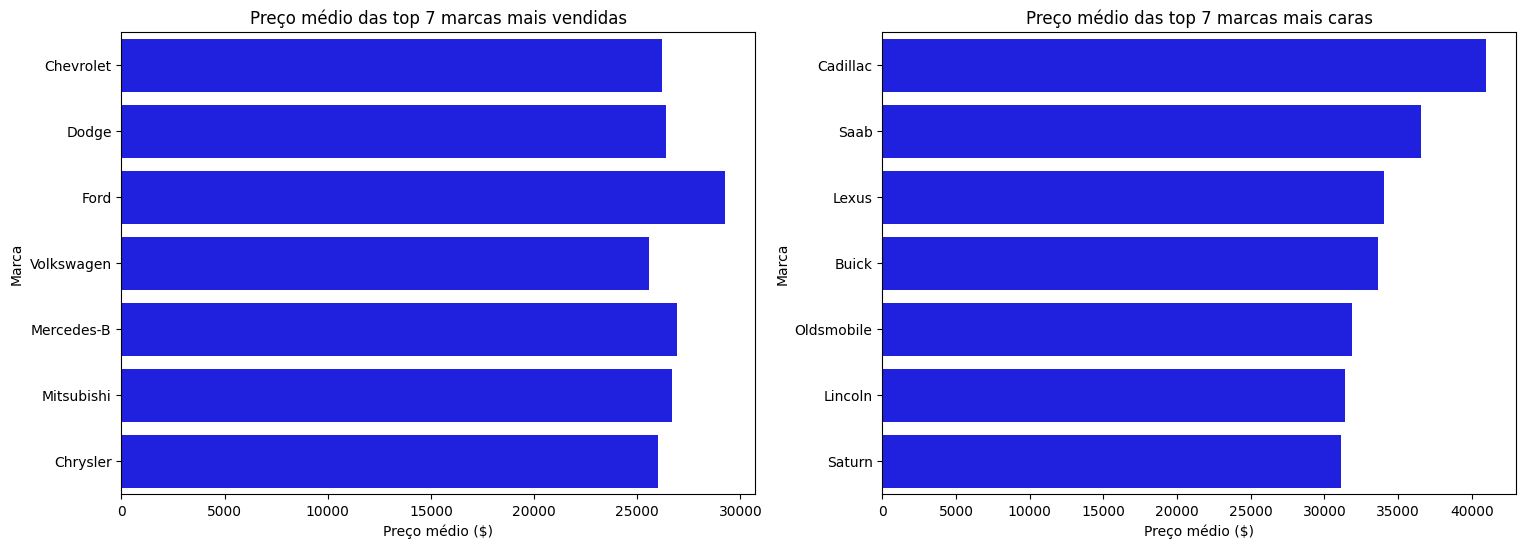

In [217]:
top_7 = media_e_qtd.head(7)
top_7_count = media_e_qtd_bycount.head(7)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x = top_7_count['mean'], y = top_7_count.index, color = 'blue', ax=axes[0])
axes[0].set_title('Preço médio das top 7 marcas mais vendidas')
axes[0].set_xlabel('Preço médio ($)')
axes[0].set_ylabel('Marca')

sns.barplot(x = top_7['mean'], y = top_7.index, color = 'blue', ax=axes[1])
axes[1].set_title('Preço médio das top 7 marcas mais caras')
axes[1].set_xlabel('Preço médio ($)')
axes[1].set_ylabel('Marca')

plt.show()

In [218]:
# 7 modelos mais vendidos
model_count_price = dados.groupby(['Model'])[['Gender', 'Price ($)']].agg({'Gender':'count', 'Price ($)':'mean'}).reset_index()
model_count_price.columns = ['Model', 'Count', 'Mean Price']
model_count_price['Mean Price'] = model_count_price['Mean Price'].round(2)
model_count_price_top10 = model_count_price.sort_values(['Count'], ascending=False).head(7).reset_index()
model_count_price_top10

,index,Model,Count,Mean Price
0,51,Diamante,418,22268.30
1,137,Silhouette,411,29858.51
2,109,Prizm,411,22838.46
3,106,Passat,391,19600.73
4,115,Ram Pickup,383,27820.86
5,81,Jetta,382,32166.85
6,113,RL,372,23598.49


In [219]:
# 7 modelos mais caros
model_count_price_top10price = model_count_price.sort_values(['Mean Price'], ascending=False).head(7).reset_index()
model_count_price_top10price

,index,Model,Count,Mean Price
0,34,Catera,90,56836.93
1,50,DeVille,80,46154.05
2,43,Contour,113,45309.08
3,78,Integra,48,44604.00
4,142,Tacoma,179,44576.74
5,63,Firebird,56,43085.95
6,42,Continental,206,42612.00


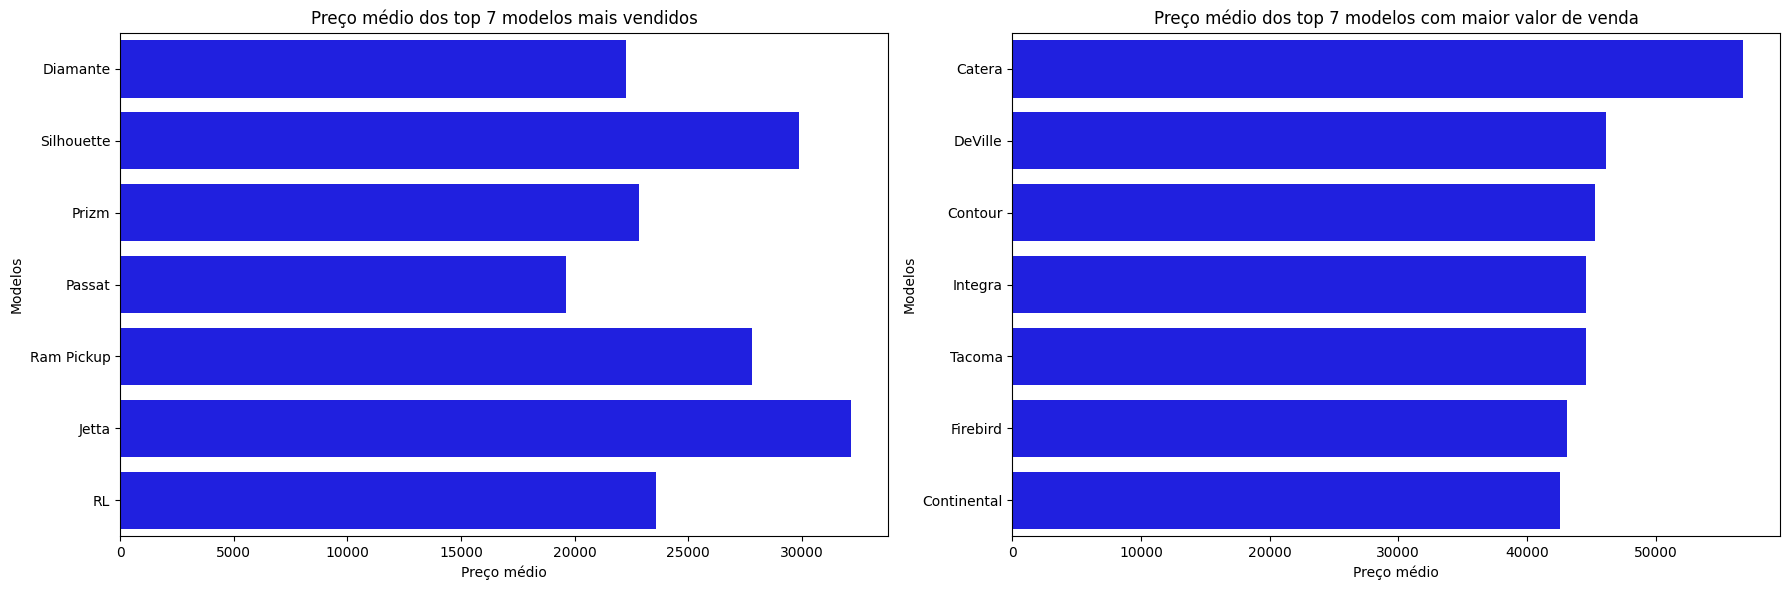

In [220]:
#Criando gráficos de preço médio por modelo
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Mean Price', y='Model', data=model_count_price_top10, ax=axes[0], orient='h', color='blue')
axes[0].set_title('Preço médio dos top 7 modelos mais vendidos')
axes[0].set_xlabel('Preço médio')
axes[0].set_ylabel('Modelos')

sns.barplot(x='Mean Price', y='Model', data=model_count_price_top10price, ax=axes[1], orient='h', color='blue')
axes[1].set_title('Preço médio dos top 7 modelos com maior valor de venda')
axes[1].set_xlabel('Preço médio')
axes[1].set_ylabel('Modelos')
plt.tight_layout()

plt.show()

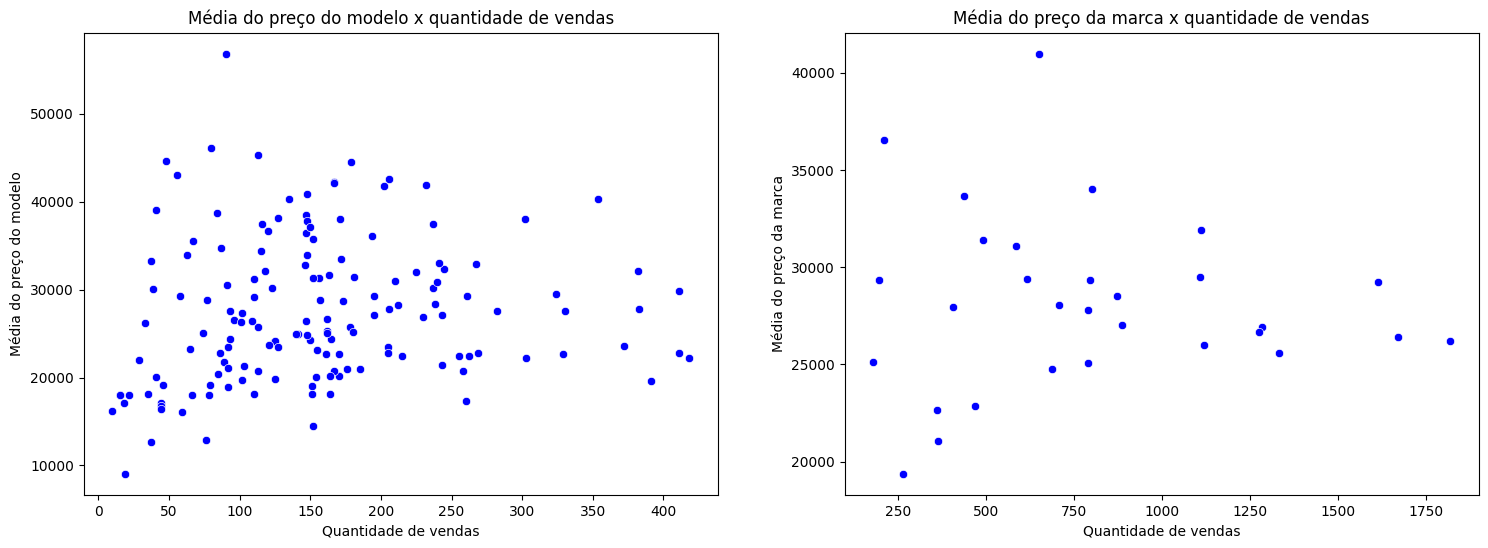

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data = model_count_price, x = 'Count', y = 'Mean Price', color = 'blue', ax=axes[0])
axes[0].set_xlabel('Quantidade de vendas')
axes[0].set_ylabel('Média do preço do modelo')
axes[0].set_title('Média do preço do modelo x quantidade de vendas')

sns.scatterplot(data = media_e_qtd, x = 'count', y = 'mean', color = 'blue', ax=axes[1])
axes[1].set_xlabel('Quantidade de vendas')
axes[1].set_ylabel('Média do preço da marca')
axes[1].set_title('Média do preço da marca x quantidade de vendas')

plt.show()

**4. Análise Temporal de Vendas:** Explore padrões sazonais ou tendências ao longo do tempo analisando as vendas em relação à data.

In [222]:
dados_temporais = dados.copy()
dados_temporais['Year'] = dados_temporais['Date'].dt.year
dados_temporais['Month'] = dados_temporais['Date'].dt.month
dados_temporais['Month_name'] = dados_temporais['Date'].dt.strftime('%B')

In [223]:
dados_temporais.head()

,Car_id,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Income_Category,Year,Month,Month_name
0,C_CND_000001,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,Até 100 mil,2022,1,January
1,C_CND_000002,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,Maior que 1 milhão,2022,1,January
2,C_CND_000003,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,Maior que 1 milhão,2022,1,January
3,C_CND_000004,2022-01-02,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,Até 100 mil,2022,1,January
4,C_CND_000005,2022-01-02,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,Maior que 1 milhão,2022,1,January


In [224]:
dados_temporais.groupby('Year')['Price ($)'].agg(['count', 'sum', 'mean'])

,count,sum,mean
Year,,,
2022,10645,300340345,28214.217473
2023,13261,371185120,27990.733730


In [225]:
dados_temporais.groupby('Month')['Price ($)'].agg(['count', 'sum', 'mean'])

,count,sum,mean
Month,,,
1,790,21696218,27463.567089
2,735,20643945,28087.000000
3,1535,41705873,27169.949837
4,1655,46864434,28316.878550
5,1895,53221243,28085.088654
6,1715,48505902,28283.324781
7,1725,48178032,27929.293913
8,1705,48793638,28617.969501
9,3305,93635178,28331.370045


In [226]:
ano_grafico = dados_temporais.groupby(['Year', 'Month', 'Month_name'])['Price ($)'].agg(['count', 'sum', 'mean']).reset_index()
ano_grafico

ano_grafico['Month_name'] = ano_grafico['Month_name'].str.slice(0,3)
ano_grafico

,Year,Month,Month_name,count,sum,mean
0,2022,1,Jan,315,8931920,28355.301587
1,2022,2,Feb,320,8795365,27485.515625
2,2022,3,Mar,705,19502059,27662.495035
3,2022,4,Apr,800,22748867,28436.083750
4,2022,5,May,750,20608086,27477.448000
5,2022,6,Jun,690,19604211,28411.900000
6,2022,7,Jul,700,19935002,28478.574286
7,2022,8,Aug,810,23631362,29174.520988
8,2022,9,Sep,1475,42218216,28622.519322
9,2022,10,Oct,835,23991509,28732.346108


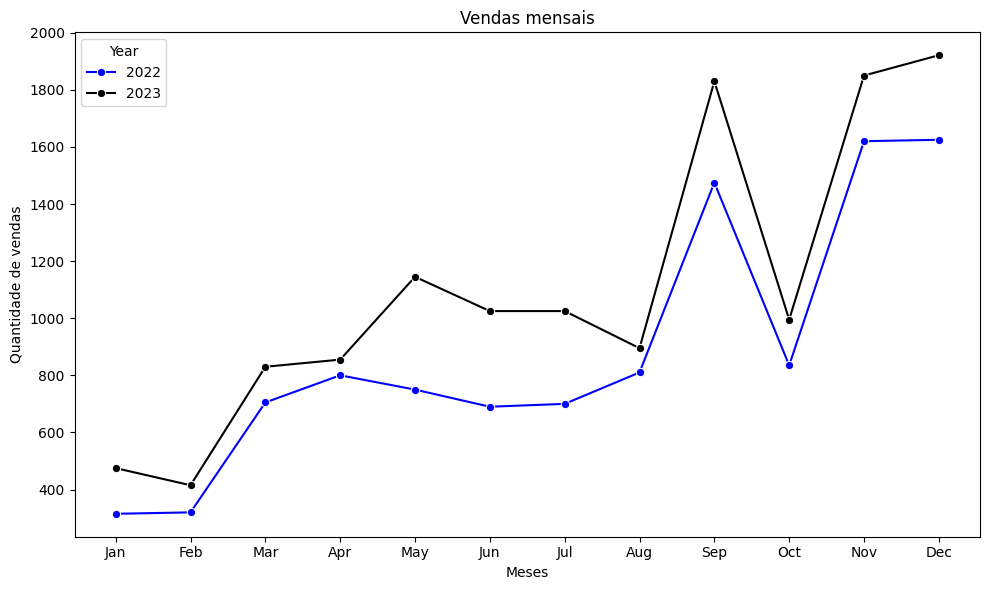

In [227]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette(['blue', 'black'])

sns.lineplot(data = ano_grafico, x = 'Month_name', y = 'count', hue = 'Year', marker = 'o', palette = palette)
plt.title('Vendas mensais')
plt.xlabel('Meses')
plt.ylabel('Quantidade de vendas')

plt.tight_layout()
plt.show()

**5. Desempenho de Revendedores:** Compare o desempenho de diferentes revendedores em termos de número de vendas, receita gerada.

In [228]:
des_rev = dados.groupby('Dealer_Name')['Price ($)'].agg(['count', 'sum']).reset_index()
des_rev

,Dealer_Name,count,sum
0,Buddy Storbeck's Diesel Service Inc,627,17065223
1,C & M Motors Inc,625,17569847
2,Capitol KIA,628,17703134
3,Chrysler Plymouth,625,17222204
4,Chrysler of Tri-Cities,626,17605055
5,Classic Chevy,623,17819055
6,Clay Johnson Auto Sales,627,17440649
7,Diehl Motor CO Inc,624,17468212
8,Enterprise Rent A Car,625,17695363
9,Gartner Buick Hyundai Saab,628,17739506


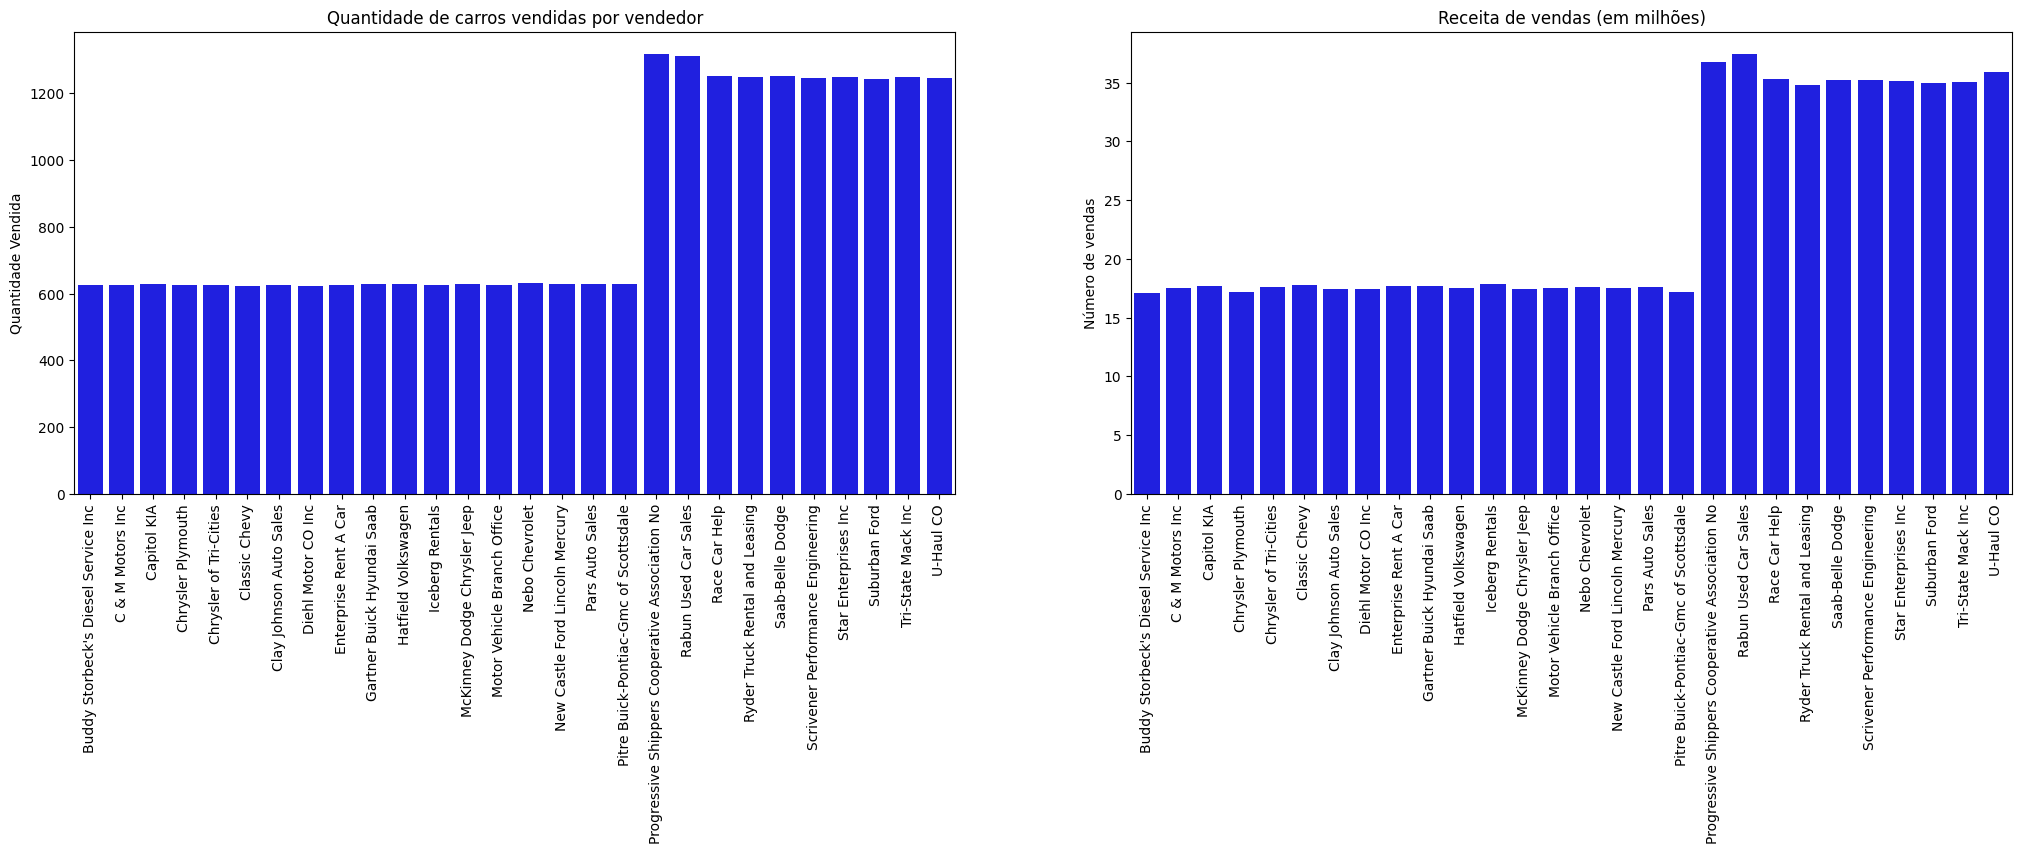

In [229]:
fig, axes = plt.subplots(1, 2, figsize=(25, 6))

sns.barplot(data=des_rev, x='Dealer_Name', y='count', ax=axes[0], color = 'blue')
axes[0].tick_params(rotation=90, axis='x')


sns.barplot(data=des_rev, x='Dealer_Name', y=des_rev['sum']/10**6, ax=axes[1], color = 'blue')
axes[1].tick_params(rotation=90, axis='x')

axes[0].set_xlabel('')
axes[1].set_xlabel('')

axes[0].set_ylabel('Quantidade Vendida')
axes[1].set_ylabel('Número de vendas')

axes[0].set_title('Quantidade de carros vendidas por vendedor')
axes[1].set_title('Receita de vendas (em milhões)')

plt.show()


**6. Análise de Correlação:** Explore se existe alguma correlação entre variáveis, como preço do carro e renda anual do cliente.

In [230]:
renda_preco = dados[['Annual Income', 'Price ($)']]
renda_preco

,Annual Income,Price ($)
0,13500,26000
1,1480000,19000
2,1035000,31500
3,13500,14000
4,1465000,24500
...,...,...
23901,13500,12000
23902,900000,16000
23903,705000,21000
23904,13500,31000


In [231]:
renda_preco['Price ($)'].min()

1200

In [232]:
#Correlação entre renda e preço do carro
renda_preco.corr()

,Annual Income,Price ($)
Annual Income,1.000000,0.012065
Price ($),0.012065,1.000000


       Annual Income     Price ($)
count   2.390600e+04  23906.000000
mean    8.308403e+05  28090.247846
std     7.200064e+05  14788.687608
min     1.008000e+04   1200.000000
25%     3.860000e+05  18001.000000
50%     7.350000e+05  23000.000000
75%     1.175750e+06  34000.000000
max     1.120000e+07  85800.000000


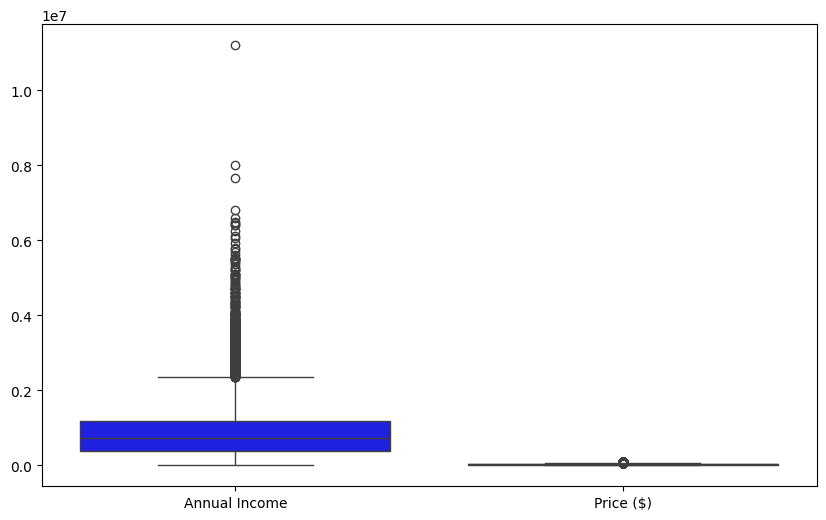

In [233]:
plt.figure(figsize=(10, 6))
print(renda_preco.describe())
sns.boxplot(data=renda_preco, color = 'blue')
plt.show()



Text(0.5, 1.0, 'Renda anual por valor')

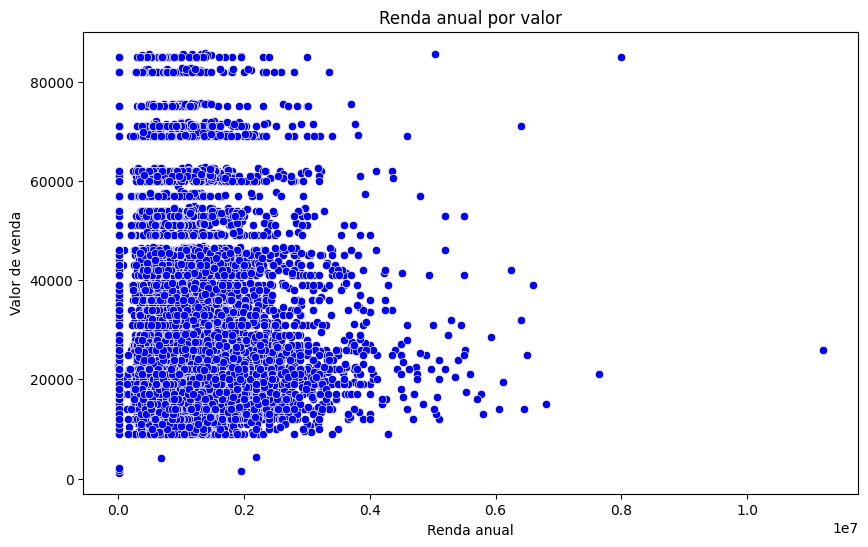

In [234]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data= renda_preco, x = 'Annual Income', y = 'Price ($)', color = 'blue')
plt.xlabel('Renda anual')
plt.ylabel('Valor de venda')
plt.title('Renda anual por valor')

**7. Distribuição de Estilos de Carro Vendidos:** Analise a distribuição dos estilos de carro vendidos (por exemplo, sedan, SUV, hatchback) para entender as preferências do mercado.

In [235]:
estilos_mais_vendidos = dados.groupby('Body Style')['Price ($)'].agg('count').reset_index()
estilos_mais_vendidos = estilos_mais_vendidos.rename(columns={'Price ($)': 'Quantidade vendida'})
estilos_mais_vendidos

,Body Style,Quantidade vendida
0,Hardtop,2971
1,Hatchback,6128
2,Passenger,3945
3,SUV,6374
4,Sedan,4488


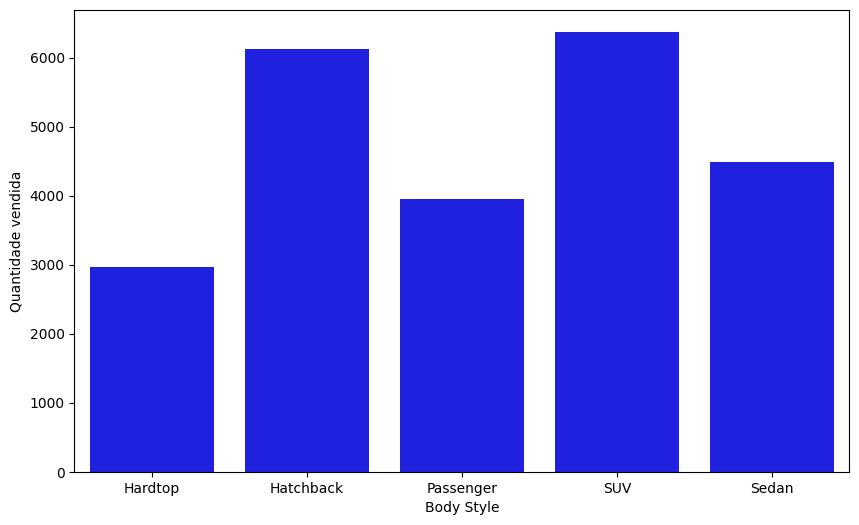

In [236]:
plt.figure(figsize=(10, 6))

sns.barplot(data=estilos_mais_vendidos, 
            x = 'Body Style', 
            y = 'Quantidade vendida',
            color = 'blue')

plt.show()

**8. Variação de Preço por Cor e Estilo do Carro:** Analise se há variação de preço com base na cor ou estilo do carro. Isso pode ajudar a determinar se certas características têm impacto no valor de mercado.

In [237]:
preco_cor_estilo = dados.groupby(['Body Style', 'Color'])['Price ($)'].agg(['count', 'mean']).reset_index()
preco_cor_estilo

,Body Style,Color,count,mean
0,Hardtop,Black,953,28671.027282
1,Hardtop,Pale White,1459,29433.600411
2,Hardtop,Red,559,29232.193202
3,Hatchback,Black,2023,29032.162630
4,Hatchback,Pale White,2905,25885.319105
5,Hatchback,Red,1200,26921.297500
6,Passenger,Black,1322,29384.076399
7,Passenger,Pale White,1752,27773.763699
8,Passenger,Red,871,30621.047072
9,SUV,Black,2248,25813.882117


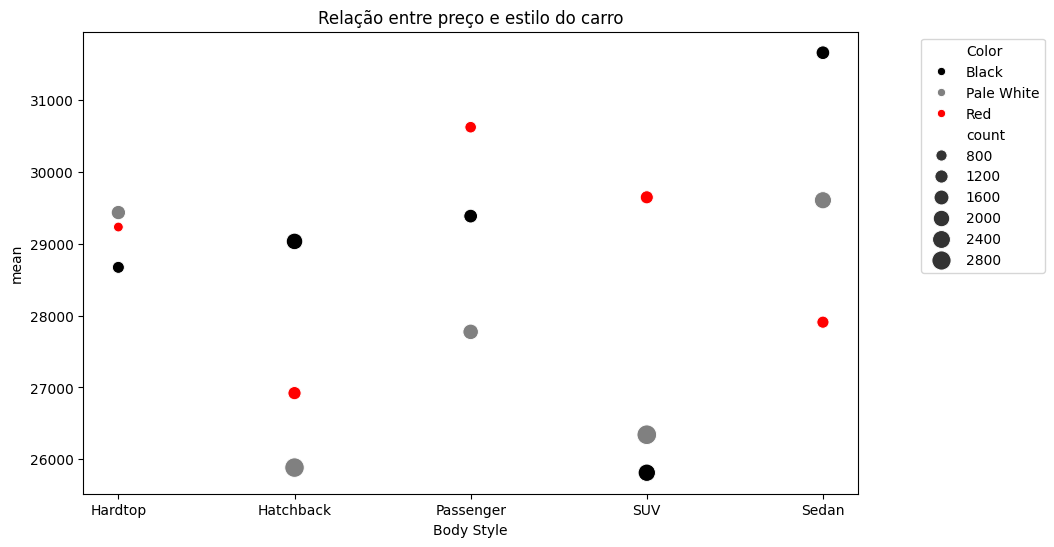

In [238]:
colors = ['black', 'grey', 'red']

plt.figure(figsize=(10, 6))
   

scatter_plot = sns.scatterplot(data = preco_cor_estilo,
                                x = 'Body Style',
                                y = 'mean',
                                hue = 'Color',
                                palette = colors,
                                hue_order = ['Black', 'Pale White', 'Red'],
                                size='count',
                                sizes=(50, 200))

scatter_plot.legend(loc='upper right', bbox_to_anchor=(1.25, 1))    

plt.title('Relação entre preço e estilo do carro')
plt.show()

**9. Análise de Demanda por Região e Estilo do Carro:** Explore se a demanda por diferentes estilos de carro varia entre as regiões dos revendedores.

In [239]:
dados.head()

,Car_id,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Income_Category
0,C_CND_000001,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,Até 100 mil
1,C_CND_000002,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,Maior que 1 milhão
2,C_CND_000003,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,Maior que 1 milhão
3,C_CND_000004,2022-01-02,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,Até 100 mil
4,C_CND_000005,2022-01-02,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,Maior que 1 milhão


In [240]:
dados['Dealer_Region'].unique()


array(['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin'], dtype=object)

In [241]:
dados[['Body Style', 'Dealer_Region']].value_counts()

Body Style  Dealer_Region
SUV         Austin           1079
Hatchback   Austin           1024
SUV         Scottsdale        988
Hatchback   Janesville        987
SUV         Janesville        983
Hatchback   Scottsdale        888
SUV         Greenville        878
            Pasco             824
Hatchback   Middletown        822
            Pasco             816
SUV         Aurora            813
            Middletown        809
Hatchback   Aurora            803
            Greenville        788
Sedan       Janesville        746
            Austin            708
            Scottsdale        702
Hardtop     Austin            685
Passenger   Austin            639
            Scottsdale        621
            Janesville        602
Sedan       Middletown        601
            Pasco             597
            Aurora            587
            Greenville        547
Passenger   Aurora            530
            Pasco             519
            Middletown        518
            Greenville

In [242]:
tipo_por_regiao = dados.groupby(['Dealer_Region', 'Body Style']).size().reset_index(name='Quantidade')
tipo_por_regiao

,Dealer_Region,Body Style,Quantidade
0,Aurora,Hardtop,397
1,Aurora,Hatchback,803
2,Aurora,Passenger,530
3,Aurora,SUV,813
4,Aurora,Sedan,587
5,Austin,Hardtop,685
6,Austin,Hatchback,1024
7,Austin,Passenger,639
8,Austin,SUV,1079
9,Austin,Sedan,708


C:\Users\renan\AppData\Local\Temp\ipykernel_9368\1605257387.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Dealer_Region', y='Quantidade', hue='Body Style', data=tipo_por_regiao, palette=paleta_azul)


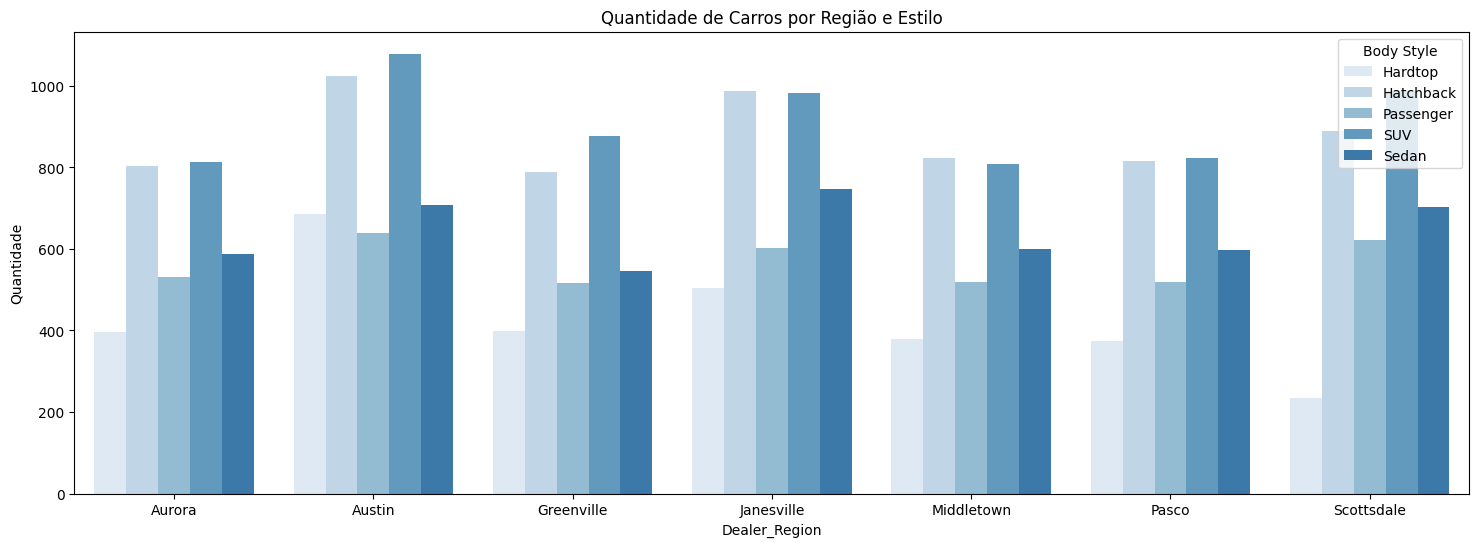

In [243]:
paleta_azul = sns.color_palette("Blues")

plt.figure(figsize=(18, 6))
sns.barplot(x='Dealer_Region', y='Quantidade', hue='Body Style', data=tipo_por_regiao, palette=paleta_azul)
plt.title('Quantidade de Carros por Região e Estilo')
plt.show()

**10. Análise de Desempenho do Modelo de Carro ao Longo do Tempo:** Analise como o desempenho de vendas de um determinado modelo de carro evolui ao longo do tempo desde o seu lançamento.


In [244]:
dados_temporais = dados.copy()
dados_temporais['Year'] = dados_temporais['Date'].dt.year
dados_temporais['Month'] = dados_temporais['Date'].dt.month
dados_temporais['Month_name'] = dados_temporais['Date'].dt.strftime('%B')
dados_temporais['Year'] = dados_temporais['Year'].astype(str)
dados_temporais['Month'] = dados_temporais['Month'].astype(str).str.zfill(2)
dados_temporais['year-month'] = dados_temporais['Year'].str.slice(2,4) + '-' + dados_temporais['Month']
dados_temporais.head(3)

,Car_id,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Income_Category,Year,Month,Month_name,year-month
0,C_CND_000001,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,Até 100 mil,2022,01,January,22-01
1,C_CND_000002,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,Maior que 1 milhão,2022,01,January,22-01
2,C_CND_000003,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,Maior que 1 milhão,2022,01,January,22-01


In [245]:
#Modelos mais vendidos
modelos_mais_vendidos = dados.groupby('Model').agg({'Gender':'count'}).reset_index()
modelos_mais_vendidos = pd.DataFrame(modelos_mais_vendidos)
modelos_mais_vendidos.columns = ['Model', 'Qtt']
modelos_mais_vendidos = modelos_mais_vendidos.sort_values('Qtt', ascending = False).head(3).reset_index()

#Marcas mais vendidas
marcas_mais_vendidas = dados.groupby('Company').agg({'Gender':'count'}).reset_index()
marcas_mais_vendidas = pd.DataFrame(marcas_mais_vendidas)
marcas_mais_vendidas.columns = ['Company', 'Qtt']
marcas_mais_vendidas = marcas_mais_vendidas.sort_values('Qtt', ascending = False).head(3).reset_index()
marcas_mais_vendidas

#Modelos maior receita
modelos_maior_receita = dados.groupby('Model').agg({'Price ($)':'sum'}).reset_index()
modelos_maior_receita = pd.DataFrame(modelos_maior_receita)
modelos_maior_receita.columns = ['Model', 'Qtt']
modelos_maior_receita = modelos_maior_receita.sort_values('Qtt', ascending = False).head(3).reset_index()

#Marcas maior receita
marcas_maior_receita = dados.groupby('Company').agg({'Price ($)':'sum'}).reset_index()
marcas_maior_receita = pd.DataFrame(marcas_maior_receita)
marcas_maior_receita.columns = ['Company', 'Qtt']
marcas_maior_receita = marcas_maior_receita.sort_values('Qtt', ascending = False).head(3).reset_index()
marcas_maior_receita


,index,Company,Qtt
0,5,Chevrolet,47655265
1,8,Ford,47231583
2,7,Dodge,44124996


In [246]:
#Agrupando por data o modelo mais vendido
qtd_Model_month = dados_temporais.groupby(['year-month','Model']).agg({'Gender':'count'}).reset_index()
qtd_Model_month.columns = ['year-month', 'Model', 'Qtt']
qtd_Model_month = pd.merge(qtd_Model_month, modelos_mais_vendidos['Model'], on = 'Model', how='inner')
qtd_Model_month

#Agrupando por data as marcas mais vendidas
qtd_company_month = dados_temporais.groupby(['year-month','Company']).agg({'Gender':'count'}).reset_index()
qtd_company_month.columns = ['year-month', 'Company', 'Qtt']
qtd_company_month = pd.merge(qtd_company_month, marcas_mais_vendidas['Company'], on = 'Company', how='inner')
qtd_company_month

#Agrupando por data os modelos de maior receita
qtd_Modelrev_month = dados_temporais.groupby(['year-month','Model']).agg({'Gender':'count'}).reset_index()
qtd_Modelrev_month.columns = ['year-month', 'Model', 'Qtt']
qtd_Modelrev_month = pd.merge(qtd_Modelrev_month, modelos_maior_receita['Model'], on = 'Model', how='inner')
qtd_Modelrev_month

#Agrupando por data as marcas de maior receita
qtd_companyRev_month = dados_temporais.groupby(['year-month','Company']).agg({'Gender':'count'}).reset_index()
qtd_companyRev_month.columns = ['year-month', 'Company', 'Qtt']
qtd_companyRev_month = pd.merge(qtd_companyRev_month, marcas_maior_receita['Company'], on = 'Company', how='inner')
qtd_companyRev_month


,year-month,Company,Qtt
0,22-01,Chevrolet,22
1,22-02,Chevrolet,20
2,22-03,Chevrolet,48
3,22-04,Chevrolet,52
4,22-05,Chevrolet,58
...,...,...,...
67,23-08,Ford,56
68,23-09,Ford,133
69,23-10,Ford,64
70,23-11,Ford,114


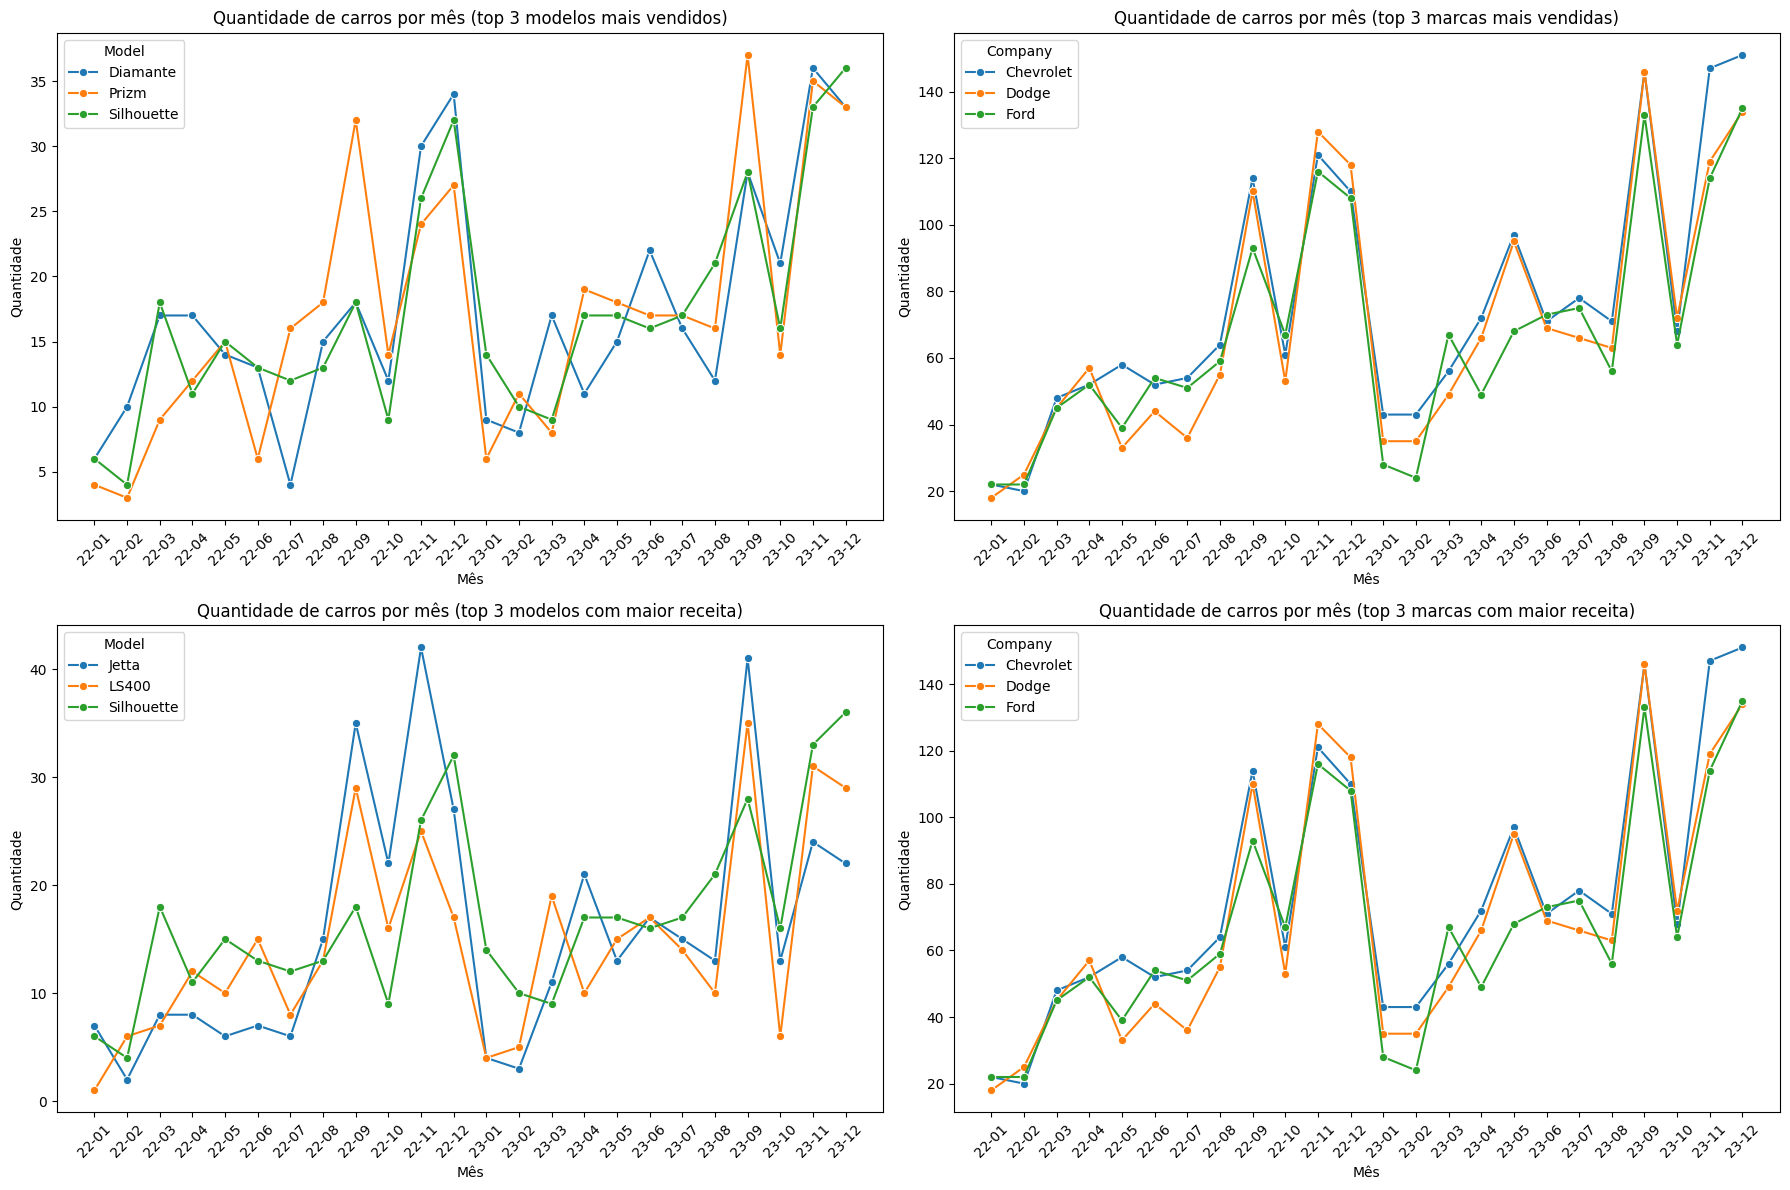

In [247]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
#Plotando quantidade por mês
sns.lineplot( x= 'year-month', y='Qtt', data= qtd_Model_month, hue='Model', marker= 'o', ax=axes[0,0])
axes[0,0].set_title('Quantidade de carros por mês (top 3 modelos mais vendidos)')
axes[0,0].set_ylabel('Quantidade')
axes[0,0].set_xlabel('Mês')
axes[0,0].tick_params(axis='x', rotation=45)
plt.tight_layout()

sns.lineplot( x= 'year-month', y='Qtt', data= qtd_company_month, hue='Company', marker= 'o', ax=axes[0,1])
axes[0,1].set_title('Quantidade de carros por mês (top 3 marcas mais vendidas)')
axes[0,1].set_ylabel('Quantidade')
axes[0,1].set_xlabel('Mês')
axes[0,1].tick_params(axis='x', rotation=45)
plt.tight_layout()

sns.lineplot( x= 'year-month', y='Qtt', data= qtd_Modelrev_month, hue='Model', marker= 'o', ax=axes[1,0])
axes[1,0].set_title('Quantidade de carros por mês (top 3 modelos com maior receita)')
axes[1,0].set_ylabel('Quantidade')
axes[1,0].set_xlabel('Mês')
axes[1,0].tick_params(axis='x', rotation=45)
plt.tight_layout()

sns.lineplot( x= 'year-month', y='Qtt', data= qtd_companyRev_month, hue='Company', marker= 'o', ax=axes[1,1])
axes[1,1].set_title('Quantidade de carros por mês (top 3 marcas com maior receita)')
axes[1,1].set_ylabel('Quantidade')
axes[1,1].set_xlabel('Mês')
axes[1,1].tick_params(axis='x', rotation=45)
plt.tight_layout()

**11. Análise de Sazonalidade nas Vendas de Carros:** Identifique padrões sazonais nas vendas de carros, como picos de vendas durante determinadas épocas do ano.


In [248]:
soma_carros = dados['Date'].value_counts().sort_index()
soma_carros

Date
2022-01-02     35
2022-01-03     20
2022-01-04     15
2022-01-05     30
2022-01-06     10
             ... 
2023-12-26     70
2023-12-27     35
2023-12-29    151
2023-12-30     40
2023-12-31     35
Name: count, Length: 612, dtype: int64

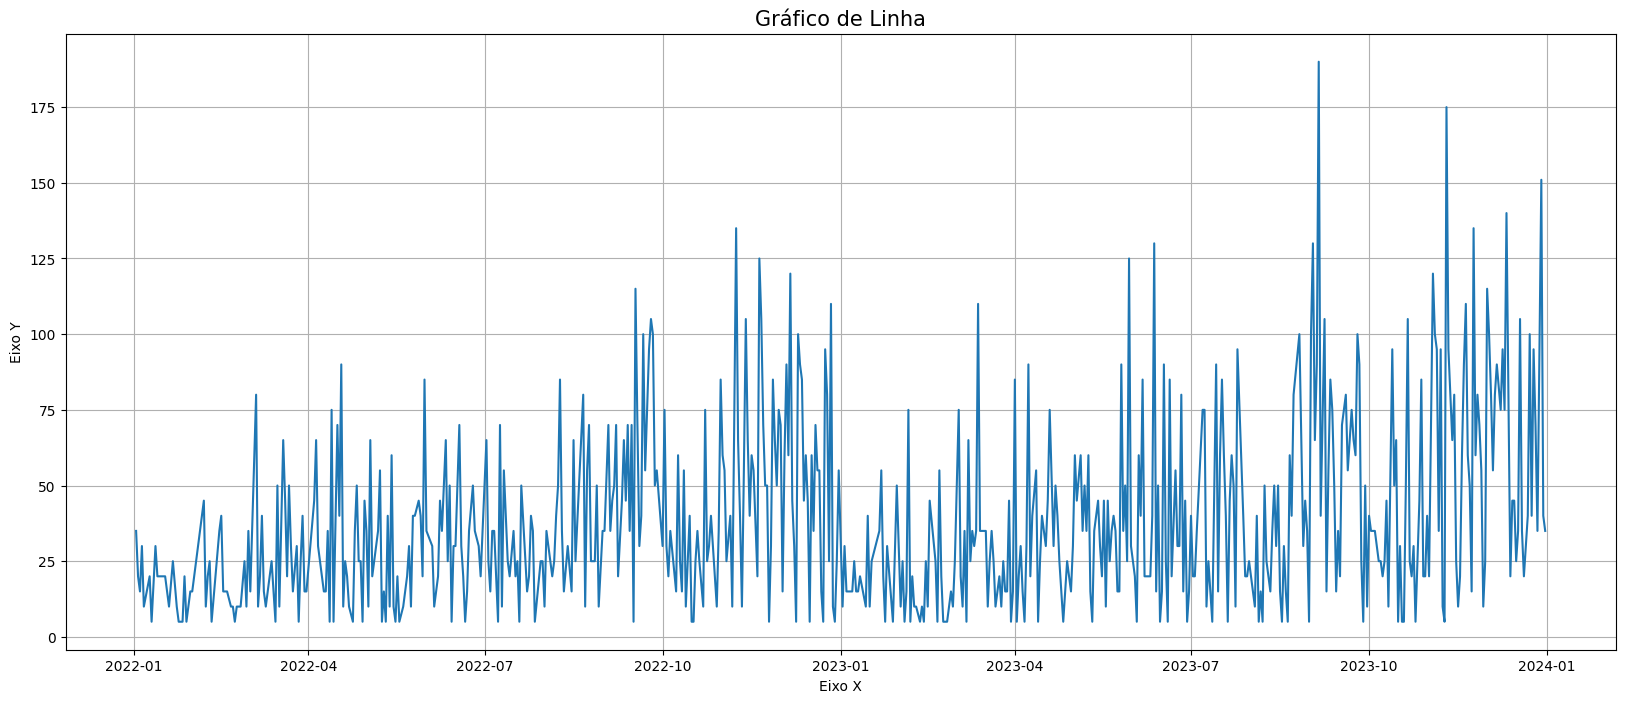

In [249]:
#Ajustando a figura
plt.figure(figsize = (20, 8))


# Grafico de linha
plt.plot(soma_carros.index, soma_carros.values )

# Colocando titulo
plt.title('Gráfico de Linha', fontsize = 15)

# Titulo para o eixo x
plt.xlabel('Eixo X')

plt.xticks()

# Titulo para o eixo y
plt.ylabel('Eixo Y')
plt.grid(True)


plt.show()

**12. Análise de Lucratividade por Modelo de Carro e Revendedor:** Determine quais modelos de carro e revendedores são mais lucrativos com base nas margens de lucro.


In [250]:
lucratividade = dados[['Price ($)', 'Model', 'Dealer_Name']].sort_values(by='Price ($)', ascending=False)
lucratividade

,Price ($),Model,Dealer_Name
7068,85800,Eldorado,Star Enterprises Inc
17129,85601,Eldorado,Rabun Used Car Sales
13605,85600,Eldorado,Hatfield Volkswagen
358,85600,RAV4,Star Enterprises Inc
9228,85500,A6,Hatfield Volkswagen
...,...,...,...
13949,4200,Explorer,McKinney Dodge Chrysler Jeep
14020,2200,CL500,Ryder Truck Rental and Leasing
14010,1700,Town car,Ryder Truck Rental and Leasing
13996,1450,S-Class,Rabun Used Car Sales


In [251]:
# Modelos de carros mais lucrativos

carro_lucrativos = lucratividade.groupby('Model')['Price ($)'].sum().reset_index()
carro_lucrativos = carro_lucrativos.sort_values(by='Price ($)', ascending=False)

carro_lucrativos

,Model,Price ($)
84,LS400,14263424
81,Jetta,12287736
137,Silhouette,12271849
97,Montero Sport,11472231
115,Ram Pickup,10655391
...,...,...
13,Alero,307302
114,RX300,270302
16,Avalon,270002
94,Mirage,172204


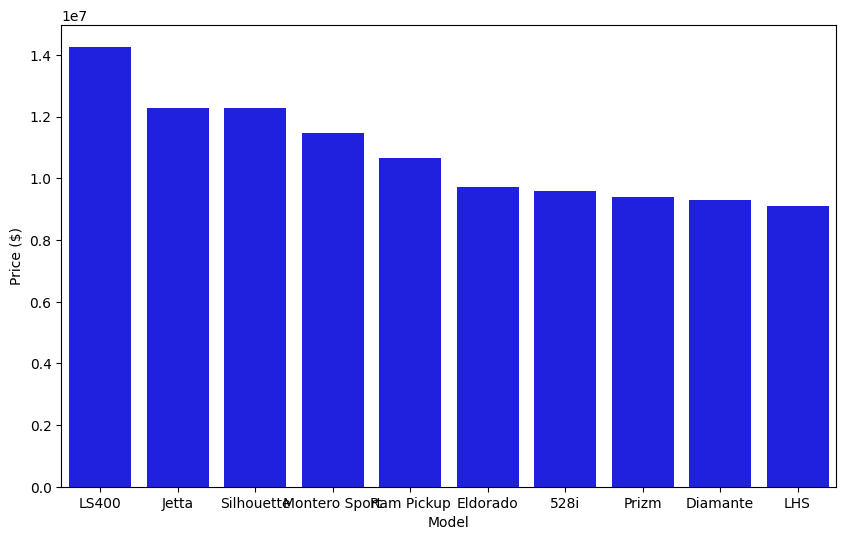

In [252]:
plt.figure(figsize=(10, 6))

sns.barplot(carro_lucrativos.head(10), x='Model', y='Price ($)', color = 'blue')

plt.show()

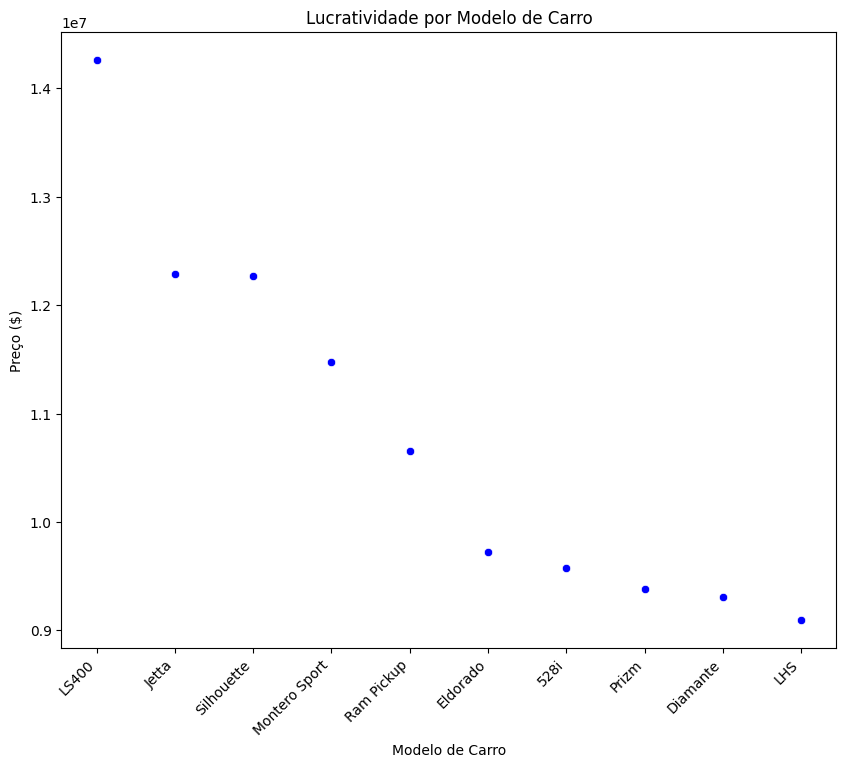

In [253]:
# Gráfico útil para visualizar a dispersão da lucratividade de cada marca

plt.figure(figsize=(10,8))

sns.scatterplot(x='Model', y='Price ($)', data=carro_lucrativos.head(10), color = 'blue')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Modelo de Carro')
plt.ylabel('Preço ($)')
plt.title('Lucratividade por Modelo de Carro')

plt.show()

In [254]:
# Revendedores mais lucrativos

revendedor_lucrativos = pd.DataFrame(lucratividade.groupby('Dealer_Name')['Price ($)'].sum().sort_values(ascending=False))

revendedor_lucrativos.head(10)


,Price ($)
Dealer_Name,
Rabun Used Car Sales,37456655
Progressive Shippers Cooperative Association No,36751460
U-Haul CO,35876089
Race Car Help,35288706
Saab-Belle Dodge,35265865
Scrivener Performance Engineering,35258525
Star Enterprises Inc,35113206
Tri-State Mack Inc,35091357
Suburban Ford,34943473


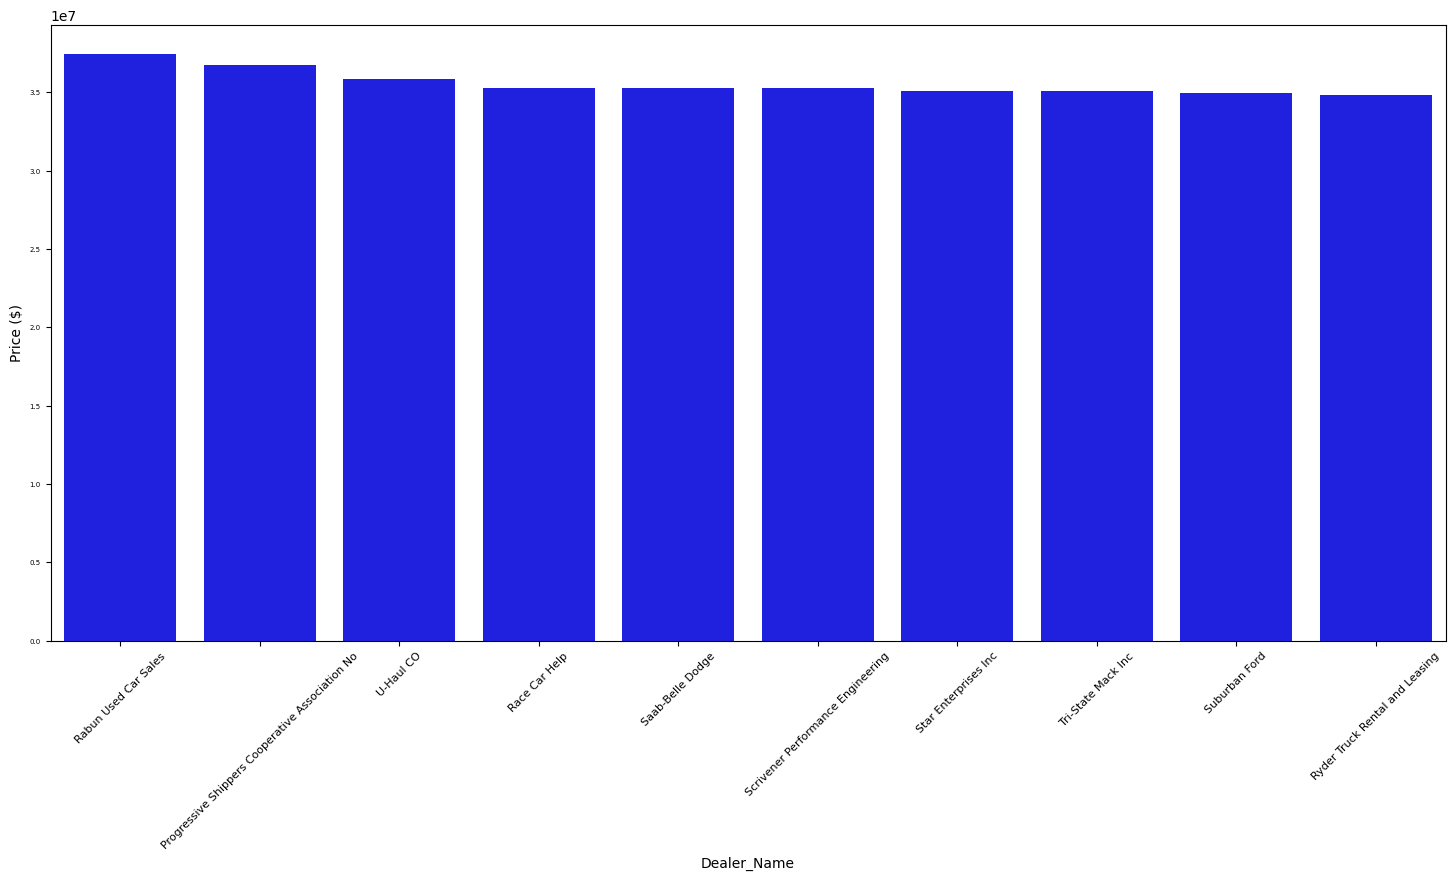

In [255]:
plt.figure(figsize=(18, 8))

sns.barplot(revendedor_lucrativos.head(10), x='Dealer_Name', y='Price ($)', color = 'blue')
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 5)

plt.show()

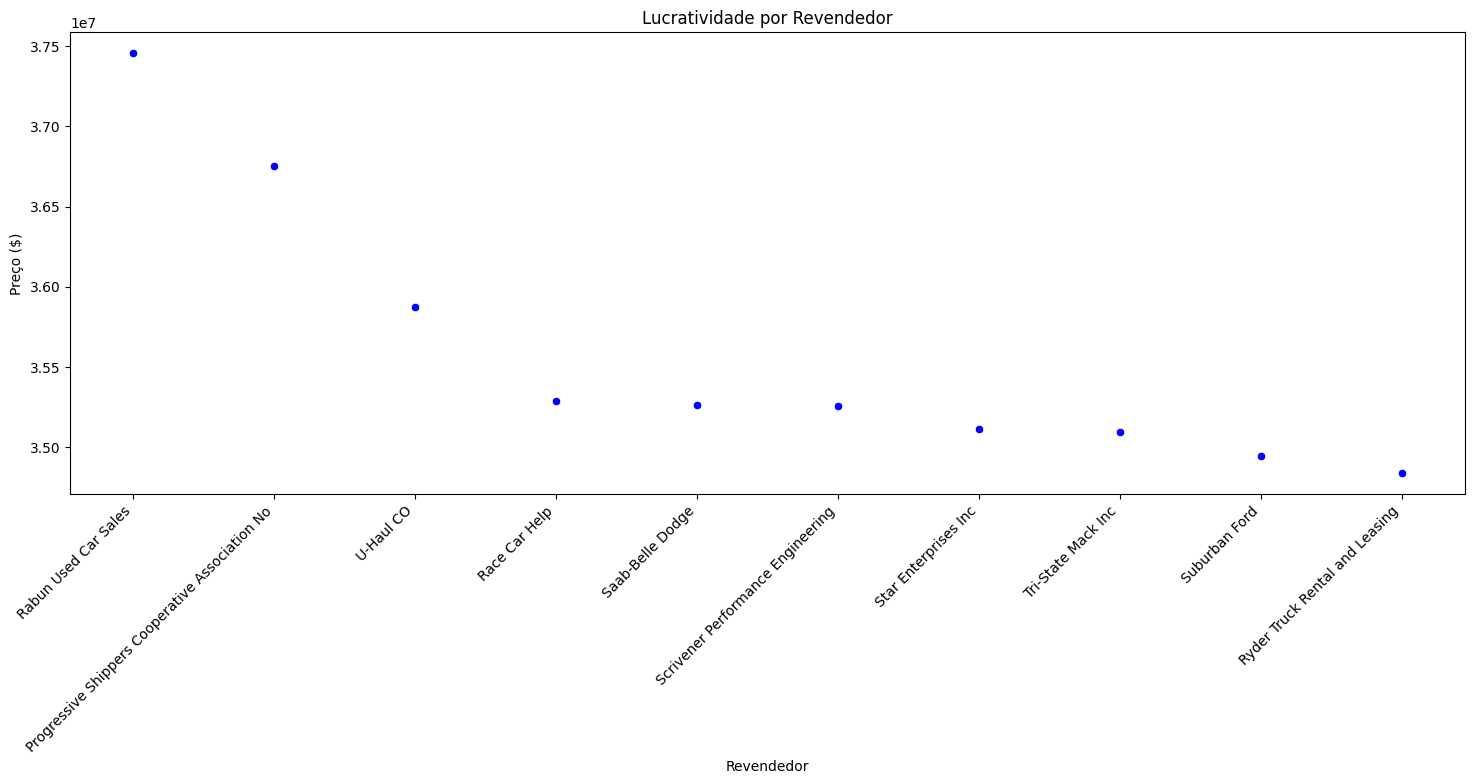

In [256]:
# Gráfico para visualizar a dispersão da lucratividade de cada revendedor

plt.figure(figsize=(18, 6))

sns.scatterplot(x='Dealer_Name', y='Price ($)', data=revendedor_lucrativos.head(10), color = 'blue')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Revendedor')
plt.ylabel('Preço ($)')
plt.title('Lucratividade por Revendedor')

plt.show()

**13. Análise de Preferências de Transmissão por Gênero:** Explore se há diferenças nas preferências de transmissão entre clientes de diferentes gêneros.

In [257]:
transmission_genero = dados.groupby(['Gender', 'Transmission']).size().reset_index(name='Quantidade')

transmission_genero['Porcentagem'] = transmission_genero['Quantidade'] / transmission_genero.groupby('Gender')['Quantidade'].transform('sum')
transmission_genero

,Gender,Transmission,Quantidade,Porcentagem
0,Female,Auto,2699,0.528387
1,Female,Manual,2409,0.471613
2,Male,Auto,9872,0.525162
3,Male,Manual,8926,0.474838


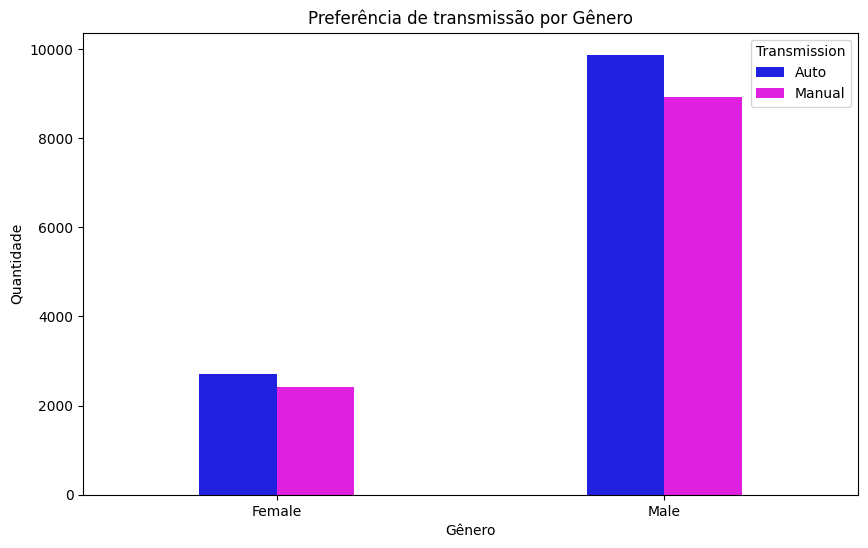

In [258]:
palette = ['blue', 'fuchsia']
plt.figure(figsize=(10, 6))
sns.barplot(data=transmission_genero, x='Gender', y='Quantidade', palette = palette,hue='Transmission', width=0.4)

plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.title('Preferência de transmissão por Gênero')
plt.show()

**14. Análise de Correlação entre Características do Carro e Preço:** Investigação de possíveis correlações entre características específicas do carro, como tipo de transmissão ou cor, e o preço de venda.

In [259]:
caracteristicas_preco = dados.groupby(['Transmission', 'Body Style', 'Color'])['Price ($)'].agg(['count', 'mean'])
caracteristicas_preco['mean'] = round(caracteristicas_preco['mean'], 2)
caracteristicas_preco

count      mean
Transmission Body Style Color                      
Auto         Hardtop    Black         465  27402.22
                        Pale White    671  35628.21
                        Red           272  28425.97
             Hatchback  Black        1131  25279.61
                        Pale White   1612  27587.93
                        Red           715  23126.82
             Passenger  Black         691  25890.50
                        Pale White    879  30632.79
                        Red           450  30207.62
             SUV        Black        1036  23675.05
                        Pale White   1465  29317.91
                        Red           585  29728.62
             Sedan      Black         849  27970.18
                        Pale White   1274  32047.28
                        Red           476  27896.84
Manual       Hardtop    Black         488  29880.03
                        Pale White    788  24158.75
                        Red           287  29996.28
             Hatchback  Black         892  33790.16
                        Pale White   1293  23762.65
                        Red           485  32515.22
             Passenger  Black         631  33209.85
                        Pale White    873  24895.09
                        Red           421  31062.95
             SUV        Black        1212  27642.13
                        Pale White   1481  23399.64
                        Red           595  29564.19
             Sedan      Black         462  38432.96
                        Pale White    920  26222.53
                        Red           507  27919.24

In [260]:
heatmap_data = caracteristicas_preco['mean'].unstack(level='Color')

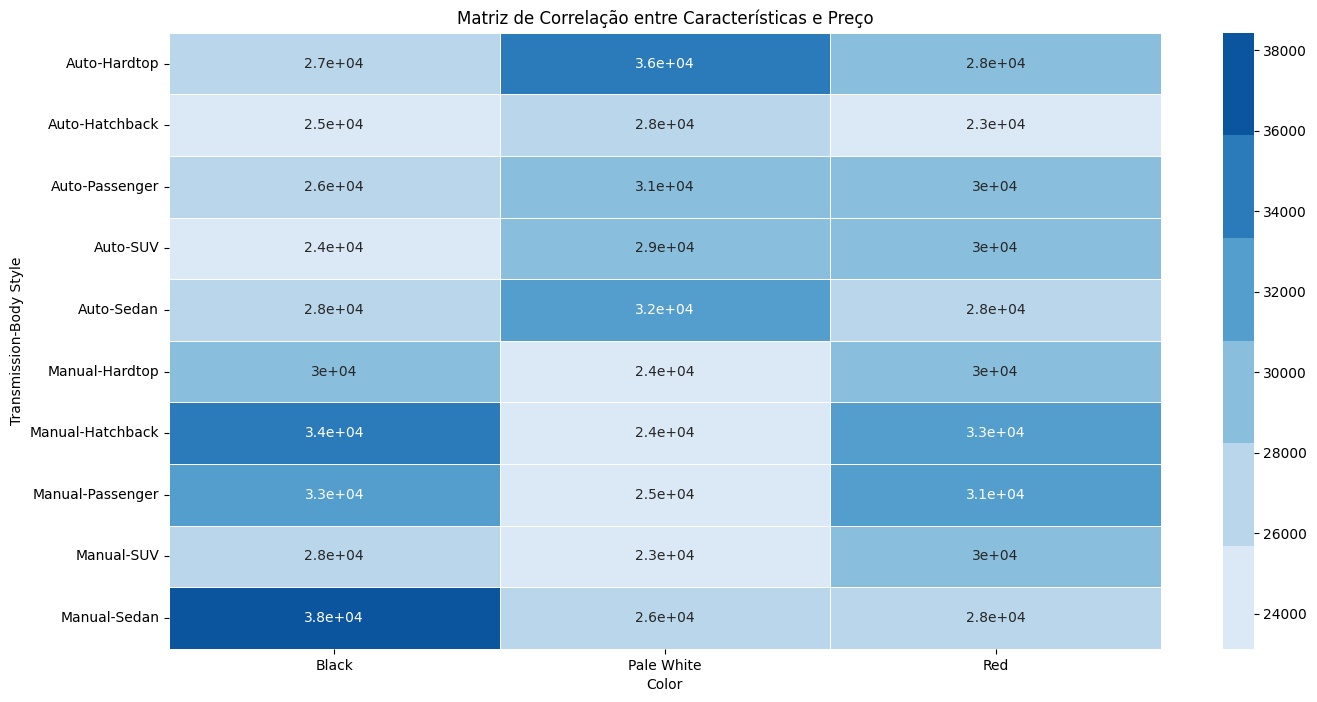

In [261]:
paleta_azul = sns.color_palette("Blues")

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, cmap=paleta_azul, linewidths=.5)
plt.title('Matriz de Correlação entre Características e Preço')
plt.show()